## import

In [1]:
import tensorflow as tf 
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train,y_train),(X_test,y_test) = load_data() # โหลดข้อมูล

จำนวน train

In [2]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


จำนวน test

In [3]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [4]:
# X_train[0] #ข้อมูลทั้งหมด
X_train[0,:,7:20] #ข้อมูลบางส่วน

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26],
       [  0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172],
       [ 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82],
       [ 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0],
       [  0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0],
       [  0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  35, 

ดูข้อมูลภาพ เป็นเลขอะไร (Target/label/class)

In [5]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
min_X , max_X = np.min(X_train) , np.max(X_train)
print("ค่าต่ำสุด:",min_X," ","ค่าสูงสุด:",max_X)

ค่าต่ำสุด: 0   ค่าสูงสุด: 255


ตรวจสอบ missing Value

In [7]:
np.isnan(X_train).sum()

0

ตรวจสอบดูค่าข้างใน

In [8]:
value_y_train = np.unique(y_train)
value_y_test = np.unique(y_test)
value_X_train = np.unique(X_train)
value_X_test = np.unique(X_test)
print("value_y_train :",value_y_train)
print("value_y_test :",value_y_test)
# print("value_X_train :",value_X_train)#[0-255]
# print("value_X_test :",value_X_test)#[0-255]

value_y_train : [0 1 2 3 4 5 6 7 8 9]
value_y_test : [0 1 2 3 4 5 6 7 8 9]


#### Visualization เเสดงภาพตัวเลข

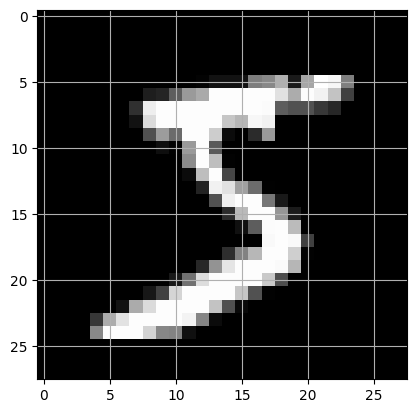

In [9]:
import matplotlib.pyplot as plt
#ต้องการเเสดงรูปตัวเลขลำดับอื่น เปลี่ยนเลข 0 ให้เป็ค่าอื่นๆ (0-59999)

img = X_train[0] #เลข index ลำดับข้อมูลภาพ
plt.imshow(img, cmap=plt.cm.gray) #พิ้นหลังดำ
# plt.imshow(img, cmap=plt.cm.gray_r) #พิ้นหลังขาว
plt.grid()
plt.show()


กรณีหลายภาพ

In [10]:
def visual_multi(i):
    # Plots 15 digit เริ่มต้นที่ i 
    nplots = 50 #จำนวน Feature ที่ต้องการแสดง (จำนวนกี่ภาพ)
    fig = plt.figure(figsize=(8,4))
    for j in range(nplots):
        plt.subplot(4,10 , j+1) # 4 Rows x 10 คอลัมน์
        plt.imshow(X_train[i + j],cmap=plt.cm.gist_gray_r) #แสดงภาพ
        plt.title(y_train[i+j]) # เขียนกำกับว่าเป็นเลขอะไร 0 1 2 3 .... (target/label)
        # plt.axis("off")
        plt.xticks([]);plt.yticks([])
plt.show()

In [11]:
# visual_multi(0)

## เตรียมข้อมูลในการ Train เเละ test
- จัดรูปเเบบโครงสร้างข้อมูลให้ตรงกับข้อกำหนดของ Convolution
- ทำการปรับ Normalize ให้ข้อมูลมีค่าอยู่ระหว้่าง 0 ถึง 1 

1 จัดรูปเเบบโครงสร้าง

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


เเบ่งข้อมูล train

In [13]:
# X_train = X_train.reshape((60000, 28, 28,1))
# X_test = X_test.reshape((10000, 28,28,1))

# X_train = X_train.reshape(-1,28,28,1) # -1 แทนจำนวนเเถวคงเดิมก็ได้
# X_test = X_test.reshape(-1,28,28,1)


In [14]:
# อีก 1 รูปเเบบอัตโนมัต
# X_train  = X_train.reshape((X_train.shape[0], X_train.shape[1],X_train.shape[2],1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2],1))

# # หรือ ใช้ np.expand_dims

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)


In [15]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Normalization

In [16]:
X_train = X_train.astype('float32') / 255.0 # เปลี่ยนเป็น float32 หาร 255 
X_test = X_test.astype('float32') / 255.0

np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [17]:
# X_train[0,10,10:15]

### เลือกจำนวน Sample

In [18]:
num_samples = 20000
X_train = X_train[:num_samples]
y_train = y_train[:num_samples]


ดูจำนวนข้อมูลภาพที่นำมาใช้ ด้วย Seaborn เพื่อดูว่าภาพที่นำมาใช้ Train (เเละ Test) มีความถึ่กระจายที่เหมาะสมไหม

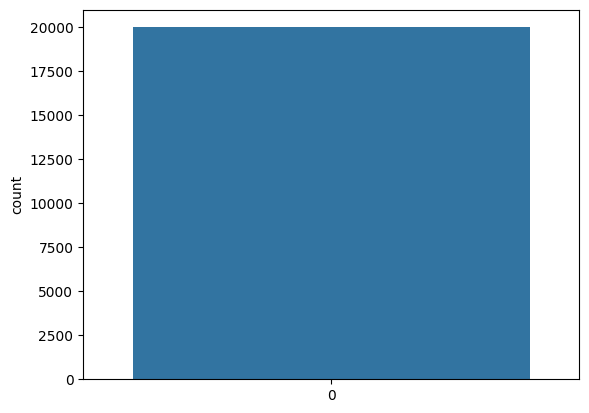

In [19]:
# ดูการกระจายตัว
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.countplot(y_train)
del sns


In [20]:
print('Train: X={},y{}'.format(X_train.shape, y_train.shape))
print('Test: X={},y{}'.format(X_test.shape, y_test.shape))

Train: X=(20000, 28, 28, 1),y(20000,)
Test: X=(10000, 28, 28, 1),y(10000,)


### สร้าง Model

In [21]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
# เช็คสมาชิกค่าใน
num_classes = len(np.unique(y_train))
num_classes

10

In [23]:
num_classes = 10

ค่ามิติ

In [24]:
in_shape = X_train.shape[1:]
in_shape


(28, 28, 1)

### สร้าง Model Convo(30) -> MaxPoo -> Convo(64)-> MaxPoo -> Flatten >..

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = in_shape)) #ชั้นเเรก
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu')) #ชั้นสอง
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [27]:
# import graphviz 
# from tensorflow.keras.utils import plot_model
# plot_model(model,'digt.pmg',show_shapes=True,show_layer_names=True)

## ทำ Compile เเละ Train 

In [28]:
import time
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
start = time.time() #เวลาเริ่ม
history = model.fit(X_train,y_train,epochs=20,batch_size=128,verbose=1,validation_split=0.1) ### Train
end = time.time() #เวลาสิ้นสุด

print('Time Taken: {:.2f} minutes'.format((end-start)/60))


Epoch 1/20
141/141 [==============================] - 6s 37ms/step - loss: 0.7041 - accuracy: 0.7773 - val_loss: 0.1362 - val_accuracy: 0.9560
Epoch 2/20
141/141 [==============================] - 5s 36ms/step - loss: 0.2213 - accuracy: 0.9319 - val_loss: 0.0932 - val_accuracy: 0.9670
Epoch 3/20
141/141 [==============================] - 5s 37ms/step - loss: 0.1634 - accuracy: 0.9504 - val_loss: 0.0654 - val_accuracy: 0.9800
Epoch 4/20
141/141 [==============================] - 5s 34ms/step - loss: 0.1334 - accuracy: 0.9588 - val_loss: 0.0549 - val_accuracy: 0.9845
Epoch 5/20
141/141 [==============================] - 5s 34ms/step - loss: 0.1164 - accuracy: 0.9643 - val_loss: 0.0454 - val_accuracy: 0.9860
Epoch 6/20
141/141 [==============================] - 5s 34ms/step - loss: 0.1017 - accuracy: 0.9691 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 7/20
141/141 [==============================] - 5s 34ms/step - loss: 0.0909 - accuracy: 0.9707 - val_loss: 0.0424 - val_accuracy: 0.9885

In [29]:
score = model.evaluate(X_test, y_test,verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9893
Accuracy: 0.989


พล๊อตกราฟดูค่า loss

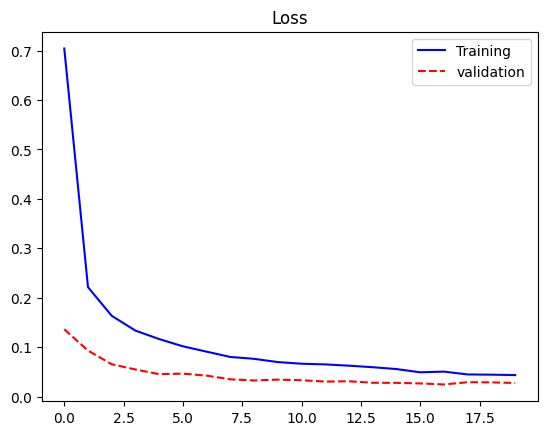

In [30]:
plt.plot(history.history['loss'],color='b',label='Training')
plt.plot(history.history['val_loss'],'r--',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

## ดูเลขที่ทายผิด

In [31]:
y_pred = model.predict(X_test) # predict ได้ผลลัพธ์รูปแบบ one - hot vector
y_pred_cls = np.argmax(y_pred, axis=1) # หาว่าเป็นคลาสใด

313/313 [==============================] - 1s 4ms/step


In [32]:
idx_miss = np.where(y_pred_cls != y_test) # y ของจริง ไม่ตรงกับ y ที่ทำนาย

In [33]:
#จำนวนที่ผิดทั้งหมด
print(len(idx_miss[0]))

107


 index ที่ผิด

In [34]:
print(idx_miss[0][:15])

[ 321  445  449  582  684  717  740  947 1014 1039 1182 1226 1247 1260
 1299]


เลขจริง

In [35]:
y_test[idx_miss][:15]

array([2, 6, 3, 8, 7, 0, 4, 8, 6, 7, 6, 7, 9, 7, 5], dtype=uint8)

คอมทาย

In [36]:
y_pred_cls[idx_miss][:15]

array([7, 0, 5, 2, 3, 6, 9, 9, 5, 3, 5, 2, 5, 1, 7], dtype=int64)

ดูภาพที่ผิด

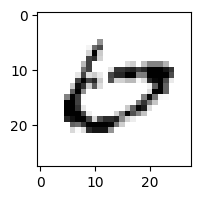

In [37]:
# เนื่องจาก Feature ผ่าน Reshape มาเเล้ว ต้องทำการ reshape ให้เป็น 28x28 ก่อนเเล้วทำการพล็อตรูป
fig = plt.figure(figsize=(2,2)) #ขนาดรูป(w x h)
plt.imshow(X_test[idx_miss][1].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

วนรูปหลายรูปทำนายผิด

In [ ]:
# nplots = 20
# fig = plt.figure(figsize=(10,3.4))
# for j,k in enumerate(idx_miss[0]):
#     plt.subplot(2,8,j+1)
#     plt.imshow(X_test[k].reshape(28,28),cmap=plt.cm.gray_r)
#     plt.title("p --> {}".format(y_pred_cls[k]))
#     plt.xticks([])
#     plt.yticks([])
#     plt.xlabel([k])
#     if j >= nplots-1:
#         break

plt.show()

## ทำนายจากรายมือ

In [43]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from  tensorflow.image import rgb_to_grayscale

img = load_img('digit0.png',target_size=(28,28))
img

In [44]:
from PIL import Image,ImageOps

img = ImageOps.invert(img) # ทำการกลับ ขาว <---> ดำ
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('Shape=', img.shape) #มิติภาพ
print('max pixl value=',np.max(img)) #

Shape= (28, 28, 1)
max pixl value= 254.97452


ปรับสเกลสีให้มีค่า 0 ถึง 1 (์Normalize)

In [46]:
img = img/255.0
print('max pixl value=',np.max(img))

max pixl value= 0.99990004


จัดรูปเเบบให้เป็น batch_size , W H Channel 

In [47]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 28, 28, 1)

Predict ว่าเป็นเลขอะไร

In [48]:
y_pred = model.predict(img)
y_pred,round(3)

1/1 [==============================] - 0s 22ms/step


(array([[6.8166344e-08, 1.1838895e-03, 8.8819405e-03, 9.7882050e-01,
         4.2359084e-03, 3.7330159e-03, 7.3412643e-06, 2.8669357e-03,
         6.0180510e-06, 2.6449381e-04]], dtype=float32),
 3)

In [49]:
predicted = np.argmax(y_pred,axis = 1)
print(predicted)

[3]


ดูภาพ input เเละ Predict

([], [])

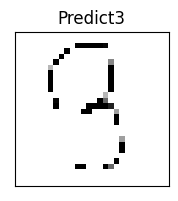

In [52]:
plt.figure(figsize=(2,2))
plt.imshow(img[0],cmap=plt.cm.gray_r)
plt.title('Predict{}'.format(predicted[0]))
plt.xticks([])
plt.yticks([])

Predict หลายตัว

In [62]:
from PIL import Image, ImageOps
imgfiles = ['digit0.png', 'digit1.png', 'digit2.png', 'digit3.png', 'digit4.png', 'digit5.png', 'digit6.png','digit7.png','digit8.png','digit9.png']
def predict_digit(imgs):
    y_pred=[]; y_pred_cls=[]; img_lst = [] #listสำหรับเก็บข้อมูล
    
    for i in imgs:
        img = load_img(i,target_size=(28,28)) #โหลดภาพเเล้วปรับขนาดเป็น 28x28
        img = ImageOps.invert(img) # Invert กลับ
        img = img_to_array(img) # เปลี่ยนเป็น array
        img = rgb_to_grayscale(img) # เปลี่ยนเป็นโทนเทา (ขาวดำ)
        img = img/255.0 # ปรับค่าสีให้อยู่ระหว่าง 0 ถึง 1
        img_lst.append(img)

        img = np.expand_dims(img,axis=0) # ปรับมิติให้เป็น (x,x,x,x)
        y_pred_i = model.predict(img) # predict
        y_pred_cls_i = np.argmax(y_pred_i,-1) # ผล predict ว่าเป็น Class อะไร
        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)
    return img_lst,y_pred_cls,y_pred

img_lst,y_pred_cls,y_pred = predict_digit(imgfiles)



1/1 [==============================] - 0s 22ms/step


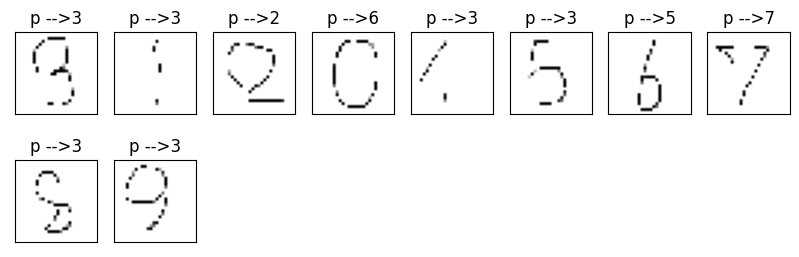

In [64]:
fig = plt.figure(figsize=(10,4.7))
for i , k  in enumerate(img_lst): #วนรอบอ่านค่าจาก List ทำการพล็อต
    plt.subplot(3,8,i+1)
    plt.imshow(k,cmap=plt.cm.gray_r) #พล็อตตัวเลขที่ทำนาย
    plt.title('p -->{}'.format(y_pred_cls[i][0]))
    plt.xticks([])
    plt.yticks([])
plt.show()
